In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
#Read the file
df = pd.read_csv("attacks.csv", encoding='latin-1')

# General information of the DataFrame

In [30]:
# Number of rows and columns
df.shape

(25723, 24)

In [31]:
# Name of each column
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

Observations:
- There are two columns (Case Number.1 and Case Number.2) that have the same name as Case Number, maybe they have the same information
- Other two columns (href and href formula) that may have similar data
- Two columns called Unnamed

In [32]:
# Data types in each column 
df.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

Observations:
- All columns have object data type except the year and the original order

In [33]:
# Visualize all the data
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations:
- There are a lot of rows which have all null data

# Operations to clean the DataFrame

## Case number column

In [34]:
# Check if the columns Case Number.1 and Case Number.2 have the same information and check if they are equal to Case Number
a=df["Case Number"].equals(df["Case Number.1"])
b=df["Case Number"].equals(df["Case Number.2"])
c=df["Case Number.1"].equals(df["Case Number.2"])
print(a,b,c)

False False False


Result: They do not have the same data

In [35]:
# Check if the difference in the data between the columns Case Number.2 and Case Number.1 is very high.
df["Case Number.1"].isin(df["Case Number.2"]).value_counts()

True     25704
False       19
Name: Case Number.1, dtype: int64

Result: There are few different entries, so I delete the column Case Number.2 so that I do not have duplicates

In [36]:
# Delete column Case Number.2
df_clean=df.drop(labels="Case Number.2", axis=1)
df_clean

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Check if the difference in the data between the columns Case Number.1 and Case Number is very high.
df["Case Number.1"].isin(df["Case Number"]).value_counts()

True     25700
False       23
Name: Case Number.1, dtype: int64

Result: There are few different entries, so I delete the column Case Number.1 so that I do not have duplicates

In [38]:
# Delete column Case Number.1
df_clean=df_clean.drop(labels="Case Number.1", axis=1)
df_clean

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Columns href and href formula

In [39]:
# Check if the columns href and href formula have the same information
df_clean["href"].equals(df_clean["href formula"])

False

Result: The do not have the same information

In [40]:
# Check the difference in the data between href and href formula
df_clean["href"].isin(df_clean["href formula"]).value_counts()

True     25666
False       57
Name: href, dtype: int64

Result: few different data so I delete the column href formula

In [41]:
# Delete href formula
df_clean=df_clean.drop(labels="href formula", axis=1)
df_clean

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Columns and rows with null data

In [42]:
# Check how many nulls are in each column
column_null=df.isnull().sum()
column_null

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

Observation: the columns Unnamed22 and Unnamed23 have many null entries (almost all of them), I delete them as I won't get much information from them.

In [43]:
#Delete columns that have more than 8000 null entries (have at least 600 non null values) which are columns Unnamed22 y Unnamed23
df_clean=df_clean.dropna(axis=1, how="all", thresh=600)
df_clean

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# There are rows with all null entries as I saw above, so I delete these rows as they won't give relevant information
df_cleanl=df_clean.dropna(how="all")
df_clean

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
#To prove the hypothesis I will get rid of rows with null data in the columns of interest.
df_clean=df_clean.dropna(how="all", subset=["Date", "Year", "Country", "Activity", "Fatal (Y/N)"])
df_clean

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href,original order
0,2018.06.25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,3.0


In [72]:
columna year se puede quitar porque lo pone en date

SyntaxError: invalid syntax (<ipython-input-72-920c16cd5458>, line 1)

## Type column

In [73]:
#Check the different entries in that column
set(df_clean["Type"])
# Hay 3 nombres de lo mismo entonces los uno en uno solo

{'Boat',
 'Invalid',
 'Provoked',
 'Questionable',
 'Sea Disaster',
 'Unprovoked',
 nan}

Observation: there are 3 names that stand for the same type of attack, I merge all in one name

In [74]:
# Replace boating and boatomg by boat
df_clean= df_clean.replace({"Boating":"Boat", "Boatomg": "Boat"})
df_clean

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href,original order
0,2018.06.25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,3.0


## Country column poner que no da info imporatante en el readme y quitarlo de aqui


In [75]:
#ver paises
print(set(df_clean['Country']))
#estan bien no hay ninguno repetido ni con otro nombre

{nan, 'BRITISH ISLES', 'HONDURAS', 'VENEZUELA', 'VIETNAM', 'IRELAND', 'YEMEN ', 'GUINEA', 'ANDAMAN ISLANDS', 'OCEAN', 'BRAZIL', 'KENYA', 'JAMAICA', 'SOMALIA', 'HONG KONG', 'PACIFIC OCEAN ', 'ITALY / CROATIA', 'HAITI', 'TANZANIA', 'CHINA', 'USA', 'LIBERIA', 'NEW GUINEA', 'FRANCE', 'TRINIDAD & TOBAGO', 'NICARAGUA', 'GHANA', 'NORTHERN ARABIAN SEA', 'NEVIS', 'ANTIGUA', 'RUSSIA', ' PHILIPPINES', 'NICARAGUA ', 'COMOROS', 'GRAND CAYMAN', 'ARGENTINA', 'AUSTRALIA', 'URUGUAY', 'EQUATORIAL GUINEA / CAMEROON', 'EL SALVADOR', 'PANAMA', 'RED SEA?', 'ATLANTIC OCEAN', 'JAPAN', 'AFRICA', 'WEST INDIES', 'MEXICO ', 'CANADA', 'CEYLON (SRI LANKA)', 'ST. MARTIN', 'TASMAN SEA', 'COLUMBIA', 'Coast of AFRICA', 'GABON', 'BAHAMAS', 'Between PORTUGAL & INDIA', 'UNITED ARAB EMIRATES (UAE)', 'BERMUDA', 'KIRIBATI', 'TOBAGO', 'SOLOMON ISLANDS / VANUATU', 'BURMA', 'BRITISH WEST INDIES', 'IRAN', 'FIJI', 'ST HELENA, British overseas territory', 'ICELAND', 'GUYANA', 'CROATIA', 'SENEGAL', 'GULF OF ADEN', 'IRAQ', 'NEW BRIT

## Columna activity lo mismo que el de arriba

In [76]:
#VEr cuantos tipos de actividades hay
set(df_clean['Activity'])
#Demasiados
#poner aqui lo que he buscado mas abajo

{nan,
 'Sinking of the M/V Mindoro during a typhoon',
 'Floating in tube',
 'Swimming or Snorkeling',
 'The shrimper Loless Maurine capsized in heavy seas & the men were swimming ashore  ',
 'Hunting crayfish ',
 'Sponge divers',
 'Windsurfing (urinating on his board)',
 'Swimming, ducking for shells in water 0.9 m deep',
 'Spearfishing, Smith  & Walker touched shark with tip of their guns',
 'Shell diving',
 'Ditched plane in the sea & were adrift on a rubber life raft. ',
 'Free diving / Photographing pilot whales',
 'Attempting to chase shark out to sea',
 'B-24 crashed during a search mission. Survivors in raft for 47 days ',
 'Swimming, after boat swamped',
 'Surfing, but standing in water alongside board',
 'Splashing in surf',
 'The British steamer Caribbee foundered',
 'Dived into the water',
 'Fishing, Struck by another shark when removing shark from line',
 'Playing in surf with his child  (9)',
 'Fell oveboard from steamer Wanderer',
 'Shark hoisted on board liner Tahiti',
 

## Name and Sex column

In [77]:
# There are several entries in the Name column from the Sex column, I check if these entries correlate to the ones in the Sex column
df_clean.loc[(df_clean["Name"]=="male")]



,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href,original order
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6296.0
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6294.0
10,2018.05.24,24-May-2018,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,male,M,32,Minor bite to hand by captive shark. PROVOKED ...,N,Morning,Grey reef shark,"ABC.net.au ,05/24/2018",2018.05.24-CairnsAquarium.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6293.0
15,2018.05.12,12-May-2018,2018.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Nahoon Beach, East London",Surfing,male,M,NaN,"Minor injury, marks on board",N,11h00,NaN,"B.Jacob, Dispatch Live, 5/12/2018",2018.05.12-EastLondon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6288.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6273,ND.0030,Before 1905,0.0,Unprovoked,BURMA,NaN,NaN,Bathing,male,M,NaN,Fatal x 2,Y,NaN,NaN,"Massillon Independent, 3/1905",ND-0030-Burma.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,30.0
6285,ND.0017,Before 1921,0.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Crew swimming alongside their anchored ship,male,M,NaN,FATAL,Y,NaN,NaN,"Captain A. Anderson, Natal Mercury, 12/31/192...",ND-0017-alongside-ship.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,18.0
6286,ND.0016,Before 1921,0.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,4 men were bathing,male,M,NaN,FATAL,Y,NaN,NaN,"Captain A. Anderson, Natal Mercury, 12/31/192...",ND-0016- Durban-PostOffice.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,17.0
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6.0


In [78]:
# I can not be sure by only seen this data, so as there can be different data in Name and Sex columns I make the data in Sex be the same that the data in Name
def corrected_sex(row):
    if row["Name"]=="male":
        return "M"
    elif row["Name"]=="female":
        return "F"
    else:
        return row["Sex "]
    
df_clean["Sex "]=df_clean.apply(corrected_sex, axis=1)
df_clean

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href,original order
0,2018.06.25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,3.0


In [79]:
#I realised the Sex column has an empty space at the end of its name, so I delete it
df_clean.rename(columns={"Sex ": "Sex"})

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href,original order
0,2018.06.25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,3.0


## Fatal column

In [80]:
# Check the column values
set(df_clean['Fatal (Y/N)'])

{' N', '2017', 'M', 'N', 'N ', 'UNKNOWN', 'Y', nan, 'y'}

Observations: There are values that refer to the same but because of the way they are written they are not recognized as the same, so I replace them by their true values, and also replace the NaN by UNKNOWN. There is a confusing value (2017) that does not correspond to this column.

In [81]:
# Replace names
df_clean["Fatal (Y/N)"].replace({" N":"N", "N ": "N", "y":"Y", "M": "N"}, inplace=True)
df_clean["Fatal (Y/N)"].fillna(("UNKNOWN"), inplace=True)

df_clean

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href,original order
0,2018.06.25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,3.0


In [82]:
#Search for the value 2017 in the data
df_clean.loc[df_clean['Fatal (Y/N)']== "2017"]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href,original order
786,2012.06.10,10-Jun-2012,2012.0,Provoked,ITALY,Sardinia,Muravera,Attempting to rescue an injured & beached shark,Giorgio Zara,M,57,Lower left leg injured PROVOKED ACCIDENT,2017,Morning,"Blue shark, 2.5m","D. Puddo, 6/11/2012",2012.06.10-Zara.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5517.0


Observation: The value does not match the year of that attack

## Species column

In [84]:
# Check the different entries in this column
set(df_clean["Species "])

{nan,
 'Bull shark',
 'White shark, 6m ',
 'Zambesi shark, 2m ',
 "White shark, 15' to 16' ",
 "Bull shark, 2.7 m [9'] was captured & dragged on the sand where tissue taken from Eggink was found in its gut. Species identification  was made by S. Springer based on 4 photographs of the shark. ",
 "White shark, 3 m to 5 m [10' to 16.5'] ",
 "Oceanic whitetip shark,1.8 m [6'] ",
 'Said to involve a tiger shark or a hammerhead shark',
 "Said to be 6.4 m [21'] shark",
 "Bronze whaler shark, 2.5 m [8.25'] ",
 'Blacktip reef shark, 1m',
 "White shark, 5.5 m to 6 m [18' to 20'] ",
 "Bronze whaler shark,4 m [13'] ",
 'White shark, species identity confirmed by tooth pattern',
 '90-kg "blackfin" shark',
 'Bronze whaler or tiger shark',
 "2.1 to 2.4 m [7' to 8'] shark",
 "Nurse shark, 1.5 m [5']",
 '"whiptail shark" (thresher shark?)',
 "Nurse shark, 2.1 m [7'] ",
 'Lemon shark',
 "6', 100-lb shark",
 '2 m shark, possibly a bronze whaler',
 'Caribbean reef sharks',
 'Lemon shark pup',
 'Bull shark

In [85]:
#The name of this column has also an empty space at the end so I rename it
df_clean.rename(columns={"Species ": "Species"})

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href,original order
0,2018.06.25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,3.0


## Hipotesis

In [ ]:
#Hay menos fatales por surfing que por fishing, aunque hay mas aaques por surfing


In [ ]:
#ver ataques por surfing y por fishing
# ver cuantos de esos ataques son fatales en cada uno


In [115]:
#ver ataques por surfing y por fishing
df_clean["Activity"].value_counts()
#mas ataques por surfing que por fishing

Surfing                                                                       971
Swimming                                                                      869
Fishing                                                                       431
Spearfishing                                                                  333
Bathing                                                                       162
                                                                             ... 
In deep water about 100 yards from his ship                                     1
Chumming for sharks                                                             1
Refused permission to cross on the ferry, he was swimming across the river      1
Cleaning the side of a ship                                                     1
The SS Potlach was torpedoed & sunk by the U-153 on 27-Jun-1942.                1
Name: Activity, Length: 1531, dtype: int64

In [153]:
# ataques fatales por surfing
df_clean[df_clean["Activity"]=="Surfing"]["Fatal (Y/N)"].value_counts()

# porcentaje de y del total =49/971

perc_Y_Surf=49/971
perc_Y_Surf

perc_N_Surf=878/971
perc_N_Surf


0.9042224510813595

In [152]:
# ataques fatales por fishing
df_clean[df_clean["Activity"]=="Fishing"]["Fatal (Y/N)"].value_counts()

perc_Y_Fish=47/431
perc_Y_Fish

perc_N_Fish=362/431
perc_N_Fish

0.839907192575406

In [ ]:
# multiindex

arrays=[]


In [ ]:
# nuevo dataframe con surfing y fiching solo
df1= df_clean.drop(df_clean[df_clean["Activity"] != "Surfing"].index)
df1
df2= df_clean.drop(df_clean[df_clean["Activity"] != "Fishing"].index)
df2
df3=pd.concat([df1,df2])
df3

In [187]:
# crear nuevo datarame con porcentaje de cada uno
# df2=pd.DataFrame({"Surfing": [49/971,47/431], "Fishing":[878/971, 362/431]}, index=["Fatal","Non fatal"])
# df2

pd.crosstab(index=df3["Fatal (Y/N)"], columns=df3["Activity"])

Activity,Fishing,Surfing
Fatal (Y/N),,
N,362,878
UNKNOWN,22,44
Y,47,49


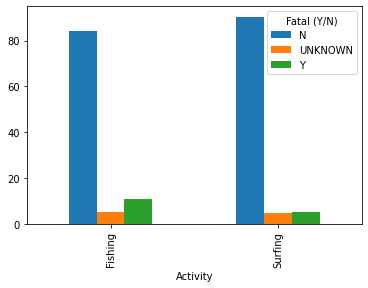

In [190]:
# grafico de si son fatales dependiendo de si es seurfing o fishing

plot = pd.crosstab(index=df3['Activity'],
            columns=df3['Fatal (Y/N)']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

# hay mas fatales en fishing en comparacion con surfing

In [160]:
#gtafico porentaje yes para cada uno
plt.plot(perc_Y_Surf, perc_N_Surf)

df_clean.groupby(["perc_Y_Surf","perc_N_Surf"])


df_S_F=pd.DataFrame({"Fatal(Y/N)":[perc_Y_Surf, perc_N_Surf], index=["Fatal", "Non fatal"]})
df_S_F.plot.pie(y="Fatal(Y/N)")

SyntaxError: invalid syntax (<ipython-input-160-28f78fa9744c>, line 4)

<AxesSubplot:xlabel='count', ylabel='Fatal (Y/N)'>

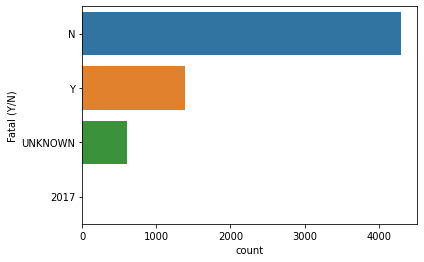

In [132]:
# grafico fatal y/n
sns.countplot(y="Fatal (Y/N)", data=df_clean)
#mayoria no son fatales

In [145]:
# grafico fatal y surfing

a=df_clean["Activity"]=="Surfing"
a   
b=df_clean["Fatal (Y/N)"]=="Y"
b




# fig,ax=plt.subplots()
# ax.plot(df_clean["Activity"]=="Surfing", df_clean["Fatal (Y/N)"]=="Y")
# plt.show()

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [120]:
ax=sns.countplot(data=df_clean, x="Fatal (Y/N)", col="Activity" hue="Surfing")

SyntaxError: invalid syntax (<ipython-input-120-52860f6fe4de>, line 1)

In [117]:
df_clean[df_clean["Activity"]=="Fishing"]["Fatal (Y/N)"].value_counts()

N          362
Y           47
UNKNOWN     22
Name: Fatal (Y/N), dtype: int64

In [102]:
#Ataques por año
df_clean["Year"]

0       2018.0
1       2018.0
2       2018.0
3       2018.0
4       2018.0
         ...  
6297       0.0
6298       0.0
6299       0.0
6300       0.0
6301       0.0
Name: Year, Length: 6302, dtype: float64

In [101]:
#Año con mas ataques 2015
df_clean["Year"].value_counts()

2015.0    143
2017.0    136
2016.0    130
2011.0    128
2014.0    127
         ... 
1801.0      1
1638.0      1
1834.0      1
1723.0      1
1786.0      1
Name: Year, Length: 249, dtype: int64

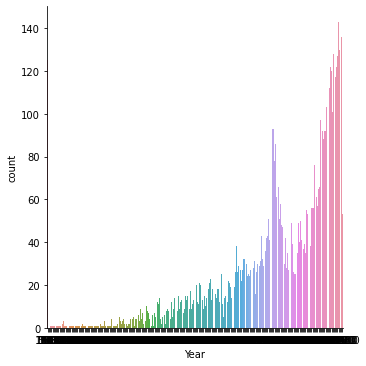

In [96]:
# plt.hist(df_clean["Year"])

sns.catplot(x="Year", kind="count", data=df_clean)

In [ ]:
#Cuantos ataques dependiendo de la actividad

In [11]:
#Actividades con mas ataques --> surfing
df_no_null2["Activity"].value_counts()

Surfing                                                                       971
Swimming                                                                      869
Fishing                                                                       431
Spearfishing                                                                  333
Bathing                                                                       162
                                                                             ... 
 a canoe was pursuing a schooner that had forcibily abducted 5 young girls      1
In water with diving seabirds                                                   1
Wreck of the 150-ton brig Maria                                                 1
Diving, retrieving fish caught in net                                           1
Spearfishing, Scuba diving                                                      1
Name: Activity, Length: 1532, dtype: int64

In [12]:
#Por surfing donde pasa mas en USA o en Australia
df_no_null2[df_no_null2["Activity"]=="Surfing"]["Country"].value_counts()
#Mas ataques por surfing en USA

USA                                      564
AUSTRALIA                                195
SOUTH AFRICA                              97
BRAZIL                                    36
REUNION                                   20
NEW ZEALAND                               12
MEXICO                                     6
INDONESIA                                  6
COSTA RICA                                 4
ECUADOR                                    4
JAPAN                                      3
NEW CALEDONIA                              2
EL SALVADOR                                2
FRENCH POLYNESIA                           2
VENEZUELA                                  2
BAHAMAS                                    2
FIJI                                       2
URUGUAY                                    1
MEXICO                                     1
GREECE                                     1
OKINAWA                                    1
CANADA                                     1
DOMINICAN 

In [13]:
#Si suelen se fatal los ataques de tiburon por surfing
df_no_null2[df_no_null2["Activity"]=="Surfing"]["Fatal (Y/N)"].value_counts()
#La mayoria no son fatales

N          878
Y           49
UNKNOWN      6
Name: Fatal (Y/N), dtype: int64

In [ ]:
sns.countplot(y="Fatal (Y/N)", hue="Surfing", data=df_clean)

TypeError: unsupported operand type(s) for -: 'pandas._libs.interval.Interval' and 'pandas._libs.interval.Interval'

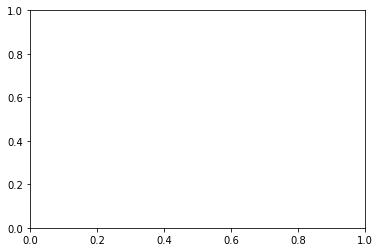

In [108]:
#A partir de que año son menos fatales

nofatal_year=df_clean[df_clean["Fatal (Y/N)"]=="N"]["Year"].value_counts()
nofatal_year

# pd.cut(df_clean.year, bins=)

bins = list(range(1638,2018,50))
# Name for each bin
# labels = [f"{str(year)[-2:]}'s" for year in range(1638,2018,50)]
df_clean["Decade"]=pd.cut(df_clean["Year"], bins=list(range(1638,2018,50)))
    
sns.histplot(df_clean["Decade"])    
# sns.countplot(y="Fatal (Y/N)", hue="Year", data=df_clean)
#nofatal_year.plot.bar()

# nofatal_year=df.groupby(['Fatal (Y/N)','Year']).size()
# nofatal_year.plot.bar()
#grafico   

#graph=plt.bar(df_no_null2["Year"], df_no_null2[str("Fatal (Y/N)")], color="plum")
#show(graph)
#plt.hist(df["nofatal_year"], color = 'skyblue')

In [ ]:
df_no_null2 = df_no_null2[~df_no_null2["Fatal (Y/N)"].isnull()]
fatal = {"Y":True,"N":False}
for k,v in fatal.items():
     df_no_null2.loc[df["Fatal (Y/N)"].str.startswith(k),"fatal_attacks"] = v


In [9]:
df_no_null2.describe()


,Year,original order
count,6300.000000,6302.000000
mean,1927.272381,3152.499683
std,281.116308,1819.375481
min,0.000000,2.000000
25%,1942.000000,1577.250000
50%,1977.000000,3152.500000
75%,2005.000000,4727.750000
max,2018.000000,6303.000000
